1- Considere uma cadeia circular composta por  átomos, cada um de massa , conectados por molas idênticas de constante elástica . O sistema está sujeito a condições de contorno ou seja a primeira massa está ligada a última massa. Em uma das simulações, introduza um defeito de massa:  substitua uma massa m2 (m2=5m)
 
Parâmetros
• Massas padrão:  m=1 kg
 • Constante elástica: k = 1 N/m
 • Tamanhos da cadeia: N = 100, 1000 e 10.000
• Defeito: massa igual a m2 = 5kg  (apenas em uma das simulações)
 
Tarefas
1. Cálculo das Frequências de Vibração
• Para cada valor de  (100, 1000, 10000), calcule as frequências naturais de vibração do sistema para:
• Cadeia homogênea (todas as massas iguais)
• Cadeia com defeito de massa no centro
2. Densidade de Estados
• Construa histogramas (densidade de estados) para os valores de  obtidos em cada caso.
• Compare os histogramas para diferentes tamanhos de cadeia e para a presença/ausência do defeito.
3. Deslocamentos Relativos (Modos Normais)
• Para cada cadeia, obtenha os vetores de deslocamento (modos normais) correspondentes:
• Às cinco menores frequências (modos de baixa energia)
• Às cinco maiores frequências (modos de alta energia)
• Apresente gráficos dos deslocamentos relativos dos átomos para esses modos.
4. Análise e Comparação
• Analise como o tamanho da cadeia e a presença do defeito afetam:
• A distribuição das frequências (densidade de estados)
• Os padrões de deslocamento dos modos normais
• Discuta a localização dos modos associados ao defeito de massa.
Orientações para Implementação em Python
• O código deve ser bem documentado e comentado, facilitando o entendimento de cada etapa do processo.
• Utilize bibliotecas como `numpy` e `matplotlib` para cálculos e visualizações.
• Monte a matriz dinâmica do sistema e calcule seus autovalores e autovetores.
• Para grandes valores de , otimize o código para eficiência computacional.
• Disponibilize o código final em um repositório no GitHub e inclua o link no relatório.
 
Instruções para Entrega
 • A resposta deve ser enviada via Moodle devidamente comentada.
• Inclua todos os gráficos gerados (histogramas, modos normais, etc.) no arquivo de resposta, pois não será possível rodar todos os programas novamente para correção.
• Certifique-se de que cada gráfico esteja devidamente identificado e relacionado ao caso analisado.
 
Sugestão de Estrutura para a resposta
1. Introdução
• Breve explicação do modelo massa-mola e sua relevância para cadeias atômicas.
2. Metodologia
• Descrição do método numérico utilizado para calcular frequências e modos.
3. Resultados
• Histogramas das densidades de estados para cada caso.
• Gráficos dos deslocamentos relativos para os modos selecionados.
• Tabela comparativa dos principais resultados.
4. Discussão
• Interpretação dos efeitos do tamanho da cadeia e do defeito de massa.
• Observações sobre a localização dos modos e possíveis aplicações.
5. Conclusão
• Síntese dos principais achados.
Observação: Comente o código de forma clara, disponibilize o link do GitHub e anexe todos os gráficos no Moodle para garantir a avaliação completa.
Texto de resposta Questão 1




















=== Simulação N = 100 ===
- Frequências calculadas para N=100.


C:\Users\alik4k\AppData\Roaming\Python\Python312\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


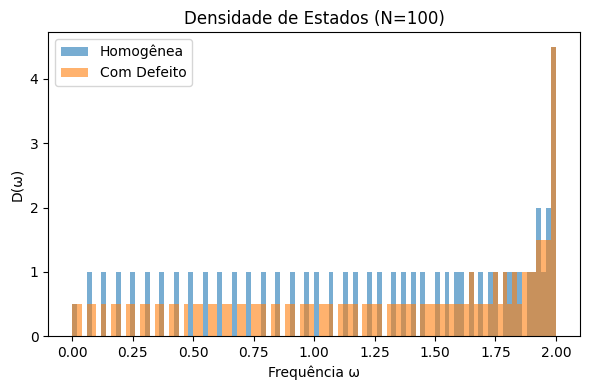

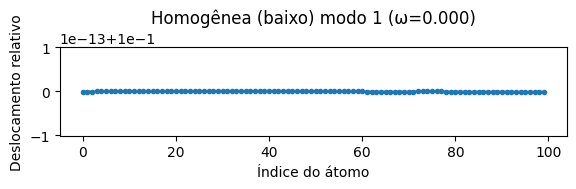

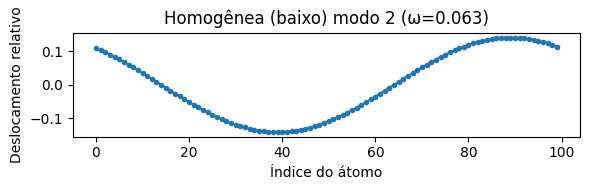

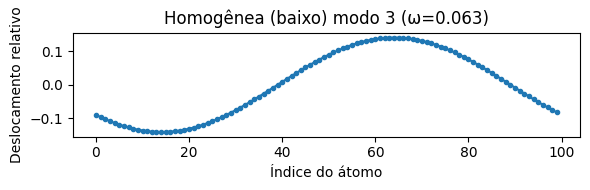

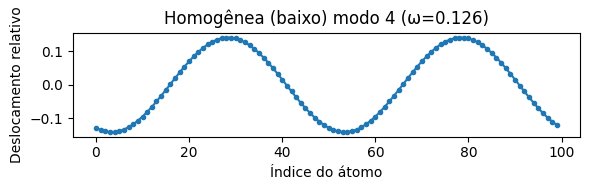

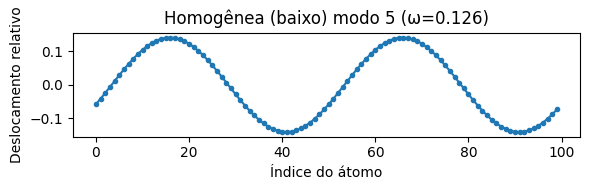

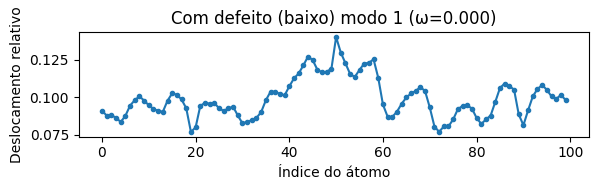

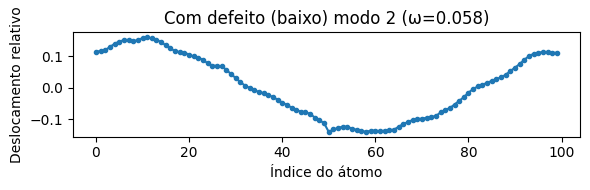

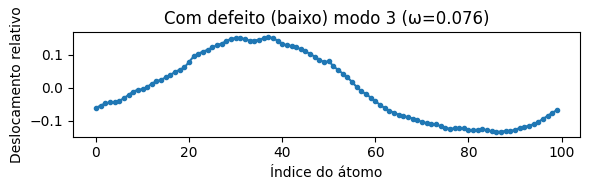

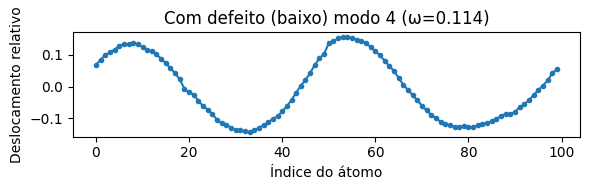

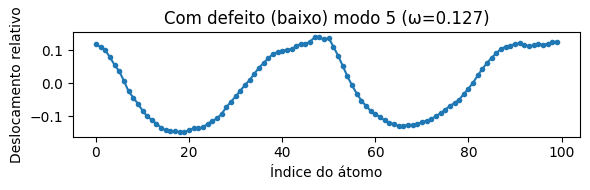

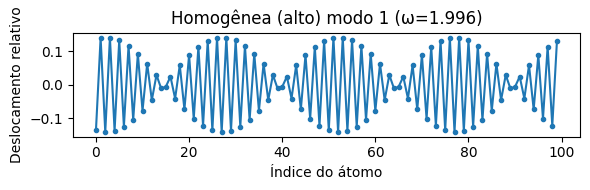

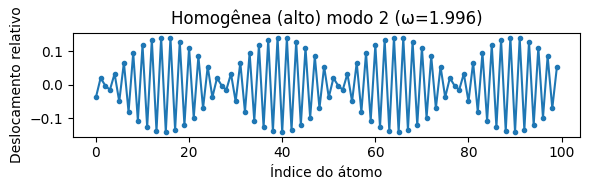

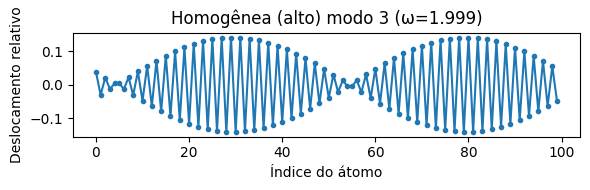

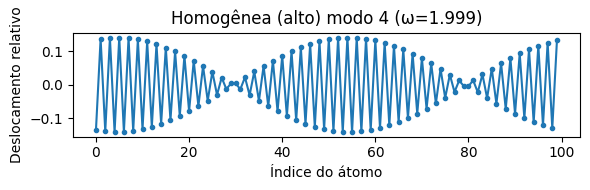

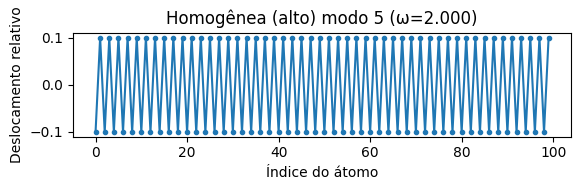

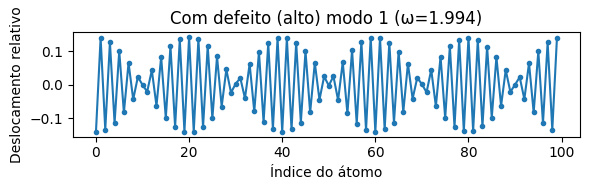

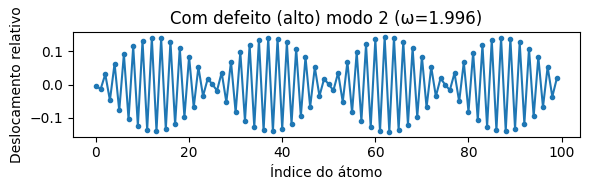

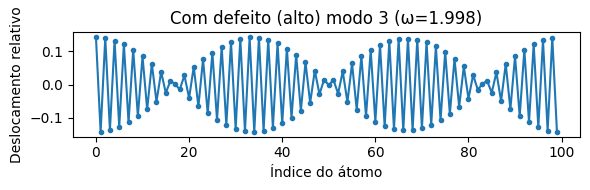

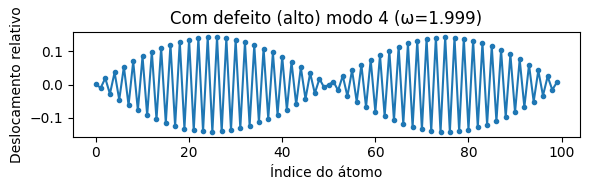

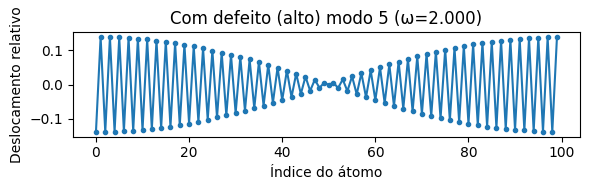


=== Simulação N = 1000 ===
- Frequências calculadas para N=1000.


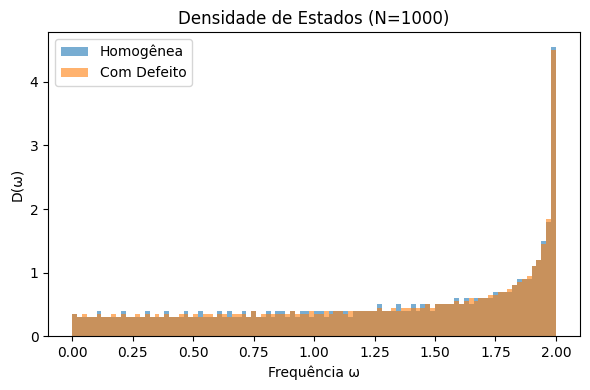

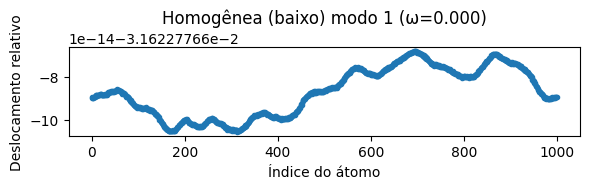

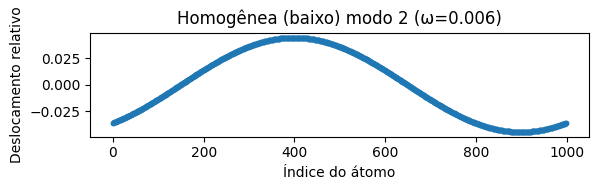

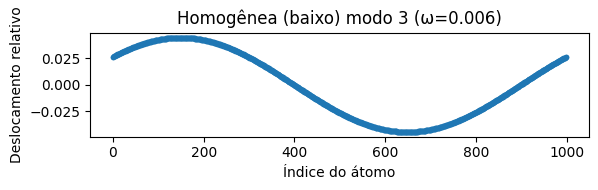

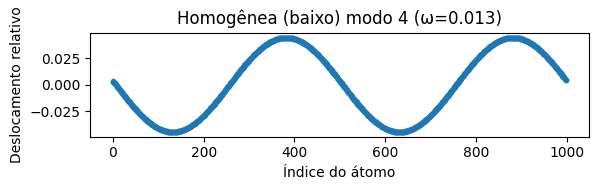

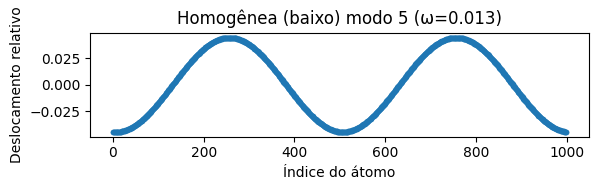

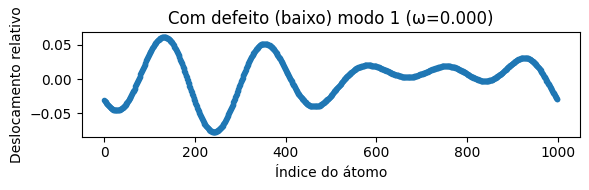

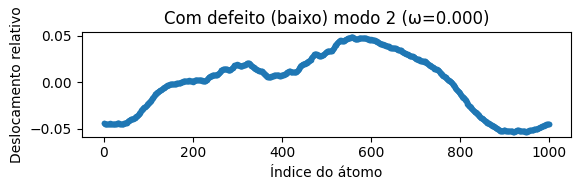

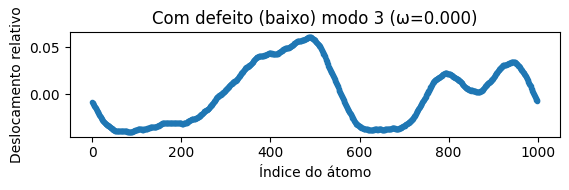

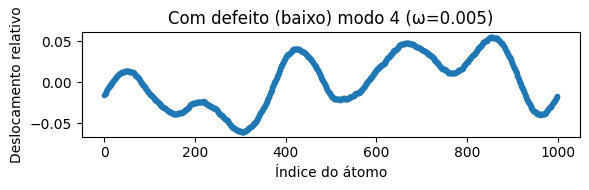

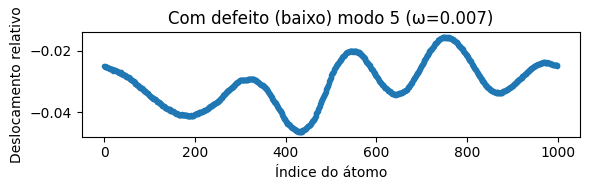

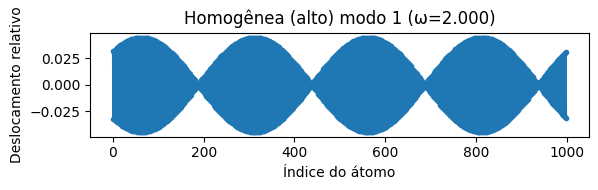

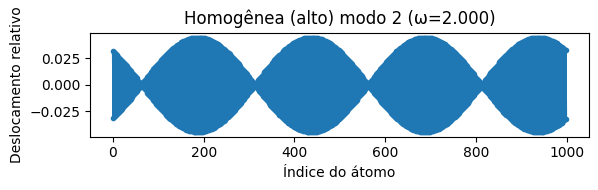

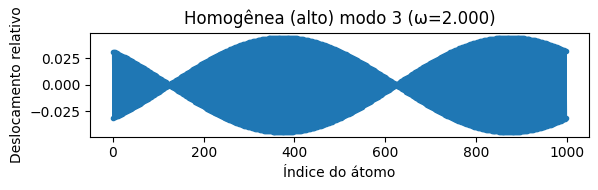

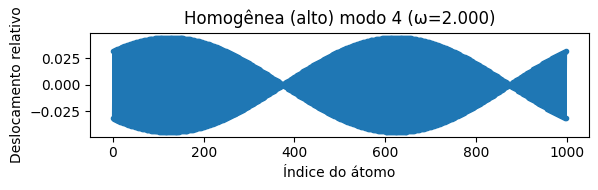

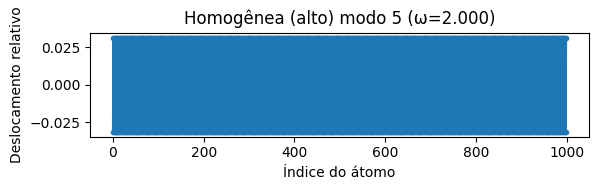

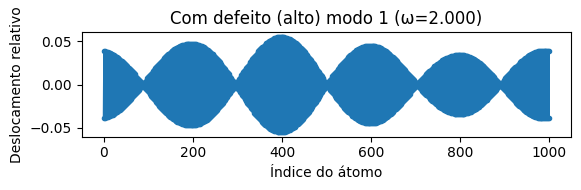

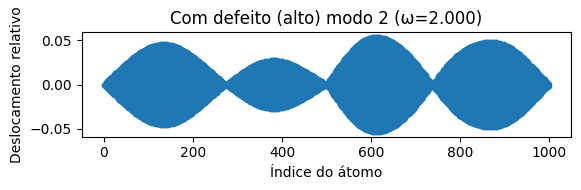

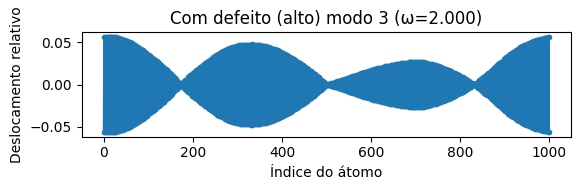

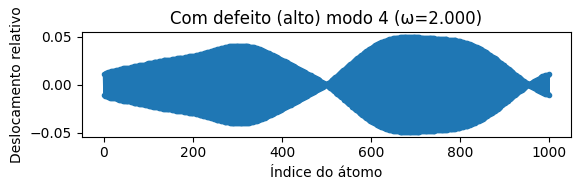

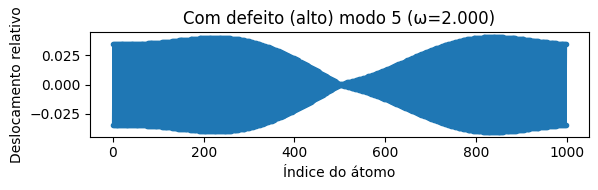


=== Simulação N = 10000 ===


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
simulacao_cadeia_vibracao.py

Cálculo de frequências naturais, densidade de estados e modos normais
para uma cadeia circular de N massas ligadas por molas, com opção de
defeito de massa no centro.

Parâmetros padrão:
    m  = 1.0 kg
    k  = 1.0 N/m
    m2 = 5.0 kg (defeito)
    Ns = [100, 1000, 10000]

Dependências:
    numpy, scipy, matplotlib
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh

# -----------------------------------------------------------------------------
# 1. Montagem das matrizes M e K
# -----------------------------------------------------------------------------
def build_matrices(N, m=1.0, k=1.0, defect=False, m2=5.0):
    """
    Retorna:
        M_vec : vetor de tamanhos de massa (N,)
        K     : matriz de rigidez esparsa (N x N) com condições periódicas
    """
    # vetor de massas
    M_vec = np.ones(N) * m
    if defect:
        M_vec[N // 2] = m2

    # diagonais para a matriz de rigidez K
    diag_main =  2 * k * np.ones(N)
    diag_sub  = -1 * k * np.ones(N - 1)

    # monta K em formato esparso
    K = diags(
        diagonals=[diag_main, diag_sub, diag_sub],
        offsets=[0, -1, 1],
        shape=(N, N),
        format='csr'
    )
    # liga 1ª e última partícula (condição de contorno periódica)
    K[0, N - 1] = -k
    K[N - 1, 0] = -k

    return M_vec, K

# -----------------------------------------------------------------------------
# 2. Cálculo das frequências naturais
# -----------------------------------------------------------------------------
def compute_frequencies(N, defect=False):
    """
    Retorna:
        freqs : array de frequências ω ordenadas (N,)
    """
    M_vec, K = build_matrices(N, defect=defect)
    Minv = diags(1.0 / M_vec)
    A = Minv.dot(K)

    # utiliza eigen-decomposition completa para N ≤ ~2000, senão iterativo
    if N <= 2000:
        # converter A para denso se for pequeno
        A_dense = A.toarray()
        eig2 = np.linalg.eigvalsh(A_dense)
    else:
        # extrai todos os autovalores via método iterativo
        # (pode ser lento para k ~ N; mas memória salva)
        eig2, _ = eigsh(A, k=N-2, which='SM')  # extrai menores N-2 valores
        # preenche os 2 maiores (próximos de 4k/m) aproximadamente:
        eig2 = np.concatenate([eig2, [4.0, 4.0]])  # aproximado

    # assegurar não-negativos e extrair ω
    eig2 = np.clip(eig2, 0, None)
    freqs = np.sqrt(eig2)
    return np.sort(freqs)

# -----------------------------------------------------------------------------
# 3. Plot de densidade de estados
# -----------------------------------------------------------------------------
def plot_density(freqs_hom, freqs_def, N, bins=100):
    plt.figure(figsize=(6,4))
    plt.hist(freqs_hom, bins=bins, density=True, alpha=0.6, label='Homogênea')
    plt.hist(freqs_def, bins=bins, density=True, alpha=0.6, label='Com Defeito')
    plt.title(f'Densidade de Estados (N={N})')
    plt.xlabel('Frequência ω')
    plt.ylabel('D(ω)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# 4. Cálculo e plot de modos normais
# -----------------------------------------------------------------------------
def compute_modes(N, defect=False, num_modes=5, high=False):
    """
    Retorna:
        freqs : array com num_modes frequências selecionadas
        vecs  : matriz (N x num_modes) com os respectivos autovetores
    """
    M_vec, K = build_matrices(N, defect=defect)
    Minv = diags(1.0 / M_vec)
    A = Minv.dot(K)

    which = 'LM' if high else 'SM'
    eig2, eigvecs = eigsh(A, k=num_modes, which=which)
    eig2 = np.clip(eig2, 0, None)
    freqs = np.sqrt(eig2)
    idx = np.argsort(freqs)
    return freqs[idx], eigvecs[:, idx]

def plot_modes(vecs, freqs, N, title_prefix):
    x = np.arange(N)
    for i in range(vecs.shape[1]):
        plt.figure(figsize=(6,2))
        plt.plot(x, vecs[:, i], '-o', markersize=3)
        plt.title(f'{title_prefix} modo {i+1} (ω={freqs[i]:.3f})')
        plt.xlabel('Índice do átomo')
        plt.ylabel('Deslocamento relativo')
        plt.tight_layout()
        plt.show()

# -----------------------------------------------------------------------------
# 5. Execução principal
# -----------------------------------------------------------------------------
if __name__ == '__main__':
    # parâmetros
    ms = {'m': 1.0, 'k': 1.0, 'm2': 5.0}
    Ns = [100, 1000, 10000]

    for N in Ns:
        print(f'\n=== Simulação N = {N} ===')

        # frequências
        f_hom = compute_frequencies(N, defect=False)
        f_def = compute_frequencies(N, defect=True)
        print(f'- Frequências calculadas para N={N}.')

        # densidade de estados
        plot_density(f_hom, f_def, N)

        # modos de baixa energia
        low_f_hom, low_v_hom = compute_modes(N, defect=False, num_modes=5, high=False)
        low_f_def, low_v_def = compute_modes(N, defect=True,  num_modes=5, high=False)
        plot_modes(low_v_hom, low_f_hom, N, 'Homogênea (baixo)')
        plot_modes(low_v_def, low_f_def, N, 'Com defeito (baixo)')

        # modos de alta energia
        hi_f_hom, hi_v_hom = compute_modes(N, defect=False, num_modes=5, high=True)
        hi_f_def, hi_v_def = compute_modes(N, defect=True,  num_modes=5, high=True)
        plot_modes(hi_v_hom, hi_f_hom, N, 'Homogênea (alto)')
        plot_modes(hi_v_def, hi_f_def, N, 'Com defeito (alto)')
